# Competicao 1 de Inteligencia Computacional

Foi dado um dataset sobre a aprovacao de pedidos de cobertura dos planos de saude. Visando uma economia para as empresas foi pedido para que um modelo fosse capaz de prever a liberacao ou nao dos beneficios.

## Inicializacao do Codigo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_treino = pd.read_csv('/content/drive/MyDrive/11P/IC/Competicao1/train.csv',index_col=0)

## Preprocessamento de dados

### Dropar Colunas que nao serao usadas

In [4]:
#Lista com nome das colunas que serao dropadas
#Lista com nome das colunas que serao dropadas
colunas_dropadas = ['NR_SEQ_REQUISICAO','NR_SEQ_ITEM','DT_REQUISICAO',
                    'NR_PRODUTO','DS_CBO','DS_TIPO_CONSULTA','QT_TEMPO_DOENCA',
                    'DS_UNIDADE_TEMPO_DOENCA','DS_TIPO_DOENCA',
                    'DS_TIPO_SAIDA','CD_GUIA_REFERENCIA','DS_INDICACAO_CLINICA',
                    'CD_ITEM','DS_ITEM','DS_CLASSE','DS_SUBGRUPO','CD_CID',
                    'DT_NASCIMENTO']

In [5]:
df_treino = df_treino.drop(columns=colunas_dropadas)

### Inserir Valores em Colunas faltantes

In [6]:
#Dicionario com as colunas que precisam ser adicionadas e seus valores
dicio = {'DS_INDICACAO_ACIDENTE': 'Indefinido',
         'DS_TIPO_INTERNACAO': 'Indefinido',
         'DS_REGIME_INTERNACAO': 'Indefinido',
         'DS_TIPO_ACOMODACAO': 'Indefinido',
         'QT_DIA_SOLICITADO': 0,
         'DS_TIPO_ATENDIMENTO': 'Indefinido'}

In [7]:
df_treino = df_treino.fillna(value=dicio)

### Discretizar categoricos


In [8]:
colunas_label_encoder = ['DS_TIPO_GUIA',
                         'DS_TIPO_PREST_SOLICITANTE',
                         'DS_INDICACAO_ACIDENTE',
                         'DS_TIPO_INTERNACAO',
                         'DS_REGIME_INTERNACAO',
                         'DS_CARATER_ATENDIMENTO',
                         'DS_TIPO_ACOMODACAO',
                         'DS_TIPO_ATENDIMENTO',
                         'DS_TIPO_ITEM',
                         'DS_GRUPO',
                         #'CD_CID',
                         'DS_STATUS_ITEM']

In [9]:
#Get Dumies
df_treino = pd.get_dummies(df_treino,columns=colunas_label_encoder)

In [10]:
df_treino=df_treino.drop(columns=['DS_STATUS_ITEM_Negado'])

In [11]:
df_treino.head()

,QT_DIA_SOLICITADO,QT_SOLICITADA,DS_TIPO_GUIA_Guia de solicitac?o SP/SADT,DS_TIPO_GUIA_Guia de solicitac?o de prorrogac?o de internac?o,DS_TIPO_GUIA_Guia de solicitac?o internac?o,DS_TIPO_PREST_SOLICITANTE_CLINICA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE UROLOGIA,DS_TIPO_PREST_SOLICITANTE_CLINICA DE IMAGEM,DS_TIPO_PREST_SOLICITANTE_CLINICA DE RADIOLOGIA,DS_TIPO_PREST_SOLICITANTE_COOPERATIVA,...,DS_GRUPO_Brasindice,DS_GRUPO_DIARIAS,DS_GRUPO_PROCED. CIRURGICOS E INVASIVOS,DS_GRUPO_PROCED. CLINICOS,DS_GRUPO_PROCED. DIAGNOSTICOS E TERAPEUTICOS,DS_GRUPO_PROCED. GERAIS,DS_GRUPO_Simpro,DS_GRUPO_TAXAS,DS_GRUPO_TUSS,DS_STATUS_ITEM_Autorizado
1,0.0,1.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0.0,1.0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Normalizar

In [12]:
#Transformar float64 em float32
colunas = ['QT_DIA_SOLICITADO','QT_SOLICITADA']
for coluna in colunas:
  df_treino[coluna] = df_treino[coluna].astype('float32')

In [13]:
df_treino['QT_DIA_SOLICITADO']=(df_treino['QT_DIA_SOLICITADO']-df_treino['QT_DIA_SOLICITADO'].min())/(df_treino['QT_DIA_SOLICITADO'].max()-df_treino['QT_DIA_SOLICITADO'].min())

df_treino['QT_SOLICITADA']=(df_treino['QT_SOLICITADA']-df_treino['QT_SOLICITADA'].min())/(df_treino['QT_SOLICITADA'].max()-df_treino['QT_SOLICITADA'].min())

## Exploracao de dados

(array([ 73143.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 153979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

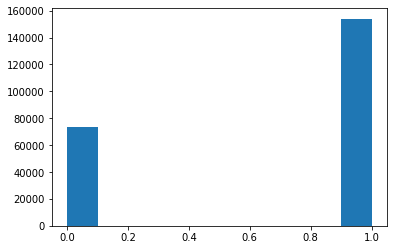

In [14]:
#Verificar o numero de aprovados e reprovados
plt.hist(df_treino['DS_STATUS_ITEM_Autorizado'])

Obs: Dados desbalanceados

## Criar modelo

*  Rede Neural Densa

In [15]:
#PreProcessamento
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#Algoritmos
import torch
from torch.utils.data import Dataset
from torch import nn
import torch.nn.functional as F

#Metricas
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
         df_treino.iloc[:, :-1], df_treino.iloc[:, -1],
         test_size=0.3, shuffle=True)

In [18]:
under_sampler = RandomUnderSampler(random_state=0)
x_treino,y_treino = under_sampler.fit_resample(x_treino, y_treino)

In [19]:
class Eventos(Dataset):

  def __init__(self,x,y):
    self.x = torch.tensor(x.values, dtype= torch.float32)
    self.y = torch.tensor(y.values, dtype= int)
    self.tamanho = x.shape[0]
  
  def __len__(self):
    return self.tamanho
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [20]:
eventos_treino = Eventos(x_treino,y_treino)
eventos_teste = Eventos(x_teste,y_teste)

In [21]:
# Fazer dataloader
batch_size = 30

loader_treino = torch.utils.data.DataLoader(eventos_treino, batch_size= batch_size,
                                            shuffle= True, drop_last = True)
loader_teste = torch.utils.data.DataLoader(eventos_teste, batch_size= batch_size,
                                            shuffle= True, drop_last = True)

In [22]:
class ModeloRedeNeural(nn.Module):
  def __init__(self):
    super(ModeloRedeNeural, self).__init__()
    # Camadas Profundas
    self.camada1 = nn.Linear(69, 100)
    self.camada2 = nn.Linear(100, 25)
    self.camada3 = nn.Linear(25, 5)
    self.comada4 = nn.Linear(5, 1)
    # dropout layer (p=0.25)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    # Sequencial
    x = F.relu(self.camada1(x))
    x = self.dropout(x)
    x = F.relu(self.camada2(x))
    x = self.dropout(x)
    x = F.relu(self.camada3(x))
    x = self.dropout(x)
    x = F.sigmoid(self.comada4(x))

    return x

In [23]:
model = ModeloRedeNeural()
if torch.cuda.is_available():
    model.cuda()
    print('Modelo está na GPU')

Modelo está na GPU


In [24]:
print(model)

ModeloRedeNeural(
  (camada1): Linear(in_features=69, out_features=100, bias=True)
  (camada2): Linear(in_features=100, out_features=25, bias=True)
  (camada3): Linear(in_features=25, out_features=5, bias=True)
  (comada4): Linear(in_features=5, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [25]:
# Taxa de aprendizagem
learningRate= 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learningRate)

In [26]:
def train_model(model,loader,nEpochs = 10):
  errors=[]
  for epoch in range(nEpochs):
    loss_treino = 0

    for data, target in loader:

        if torch.cuda.is_available():
          data = torch.tensor(data).to('cuda')
          target = torch.tensor(target).to('cuda')
  
        # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
        optimizer.zero_grad()
        # calculamos a saída da rede
        outputs = model(data)
        # calcula o erro
        target = target.unsqueeze(1)
        target = target.float()
        loss = criterion(outputs, target)
        loss_treino += loss.item()
        # calcula os gradientes
        loss.backward()
        # atualiza parâmetros 
        optimizer.step()

    errors.append(loss_treino/len(loader.dataset))
    print('Epoch:' + str(epoch) + ' errors: ' + str(loss_treino/len(loader.dataset)))

  return errors

In [27]:
erros = train_model(model,loader_treino,50)

<ipython-input-26-2d27e89c4940>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).to('cuda')
<ipython-input-26-2d27e89c4940>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to('cuda')
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch:0 errors: 0.023059976542104753
Epoch:1 errors: 0.0228569742781802
Epoch:2 errors: 0.02270669246141373
Epoch:3 errors: 0.022609311894039162
Epoch:4 errors: 0.022550358305914252
Epoch:5 errors: 0.022483060364482183
Epoch:6 errors: 0.02246794735896205
Epoch:7 errors: 0.022422511897040982
Epoch:8 errors: 0.02241538074889276
Epoch:9 errors: 0.022413880698276965
Epoch:10 errors: 0.022372801570206977
Epoch:11 errors: 0.022341759810292364
Epoch:12 errors: 0.022360911448809036
Epoch:13 errors: 0.022335728058743686
Epoch:14 errors: 0.022330431178720325
Epoch:15 errors: 0.022327029257796907
Epoch:16 errors: 0.022307595153566413
Epoch:17 errors: 0.022304530924425386
Epoch:18 errors: 0.022293749394345305
Epoch:19 errors: 0.022296601465279436
Epoch:20 errors: 0.0222640826963864
Epoch:21 errors: 0.022282965070261035
Epoch:22 errors: 0.02226877259256453
Epoch:23 errors: 0.022243742399574898
Epoch:24 errors: 0.02225164016553031
Epoch:25 errors: 0.02224552905702828
Epoch:26 errors: 0.0222292191097

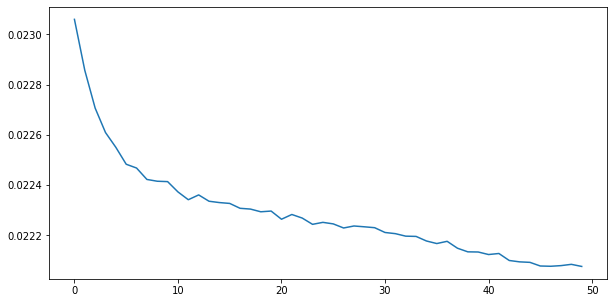

In [32]:
plt.figure(figsize=(10,5))
plt.plot(erros)

In [29]:
def test_model(loader, model):
    model.eval()

    accuracy = 0
    y_pred = []
    y_true = []

    for sample1, target1 in loader:
        if torch.cuda.is_available():
            sample1, target1 = sample1.cuda(), target1.cuda()
            model.cuda()

        prediction = model(sample1)
        outputsClass = torch.argmax(prediction, dim=1)

        if torch.cuda.is_available():
            yt = np.array([t.cpu().numpy() for t in outputsClass])
            yp = np.array([t.cpu().numpy() for t in target1])

        else:
            yt = np.array([t.numpy() for t in outputsClass])
            yp = np.array([t.numpy() for t in target1])
      
        for x in range(len(yp)):
            y_pred.append(yp.item(x))
        for x in range(len(yt)):
            y_true.append(yt.item(x))

    CM = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
        
    return CM.tolist(), accuracy

In [33]:
cm, acuracia = test_model(loader_teste,model)

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [34]:
print(cm)
print(acuracia)

[[22060, 46070], [0, 0]]
0.32379274915602524
